In [3]:
import sys
print(sys.executable)

C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python313\python.exe


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'

In [72]:
def wrangle(path):
    
    # read the csv file
    df = pd.read_csv(path, index_col='InvoiceDate', parse_dates=['InvoiceDate'])

    # create the revenue col
    df['Revenue'] = df['Quantity'] * df['UnitPrice']

    # drop unecessary cols
    df.drop(columns=['Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country'], inplace=True)

    # resample to daily freq
    df = df.resample('D').mean().dropna()

    # return the transformed df
    return df

In [73]:
df = wrangle("C:/Users/HP PROBOOK/Documents/Cardio/Analysis/Online_Retail.csv")
df.head()

,Revenue
InvoiceDate,
2010-12-01,18.866010
2010-12-02,21.909569
2010-12-03,20.717738
2010-12-05,11.517046
2010-12-06,13.888649


<Axes: xlabel='InvoiceDate'>

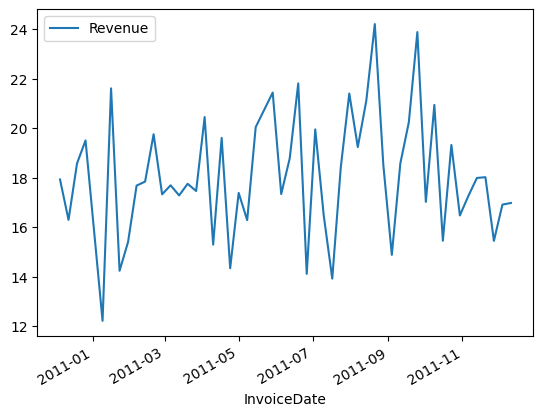

In [61]:
df.plot()

In [42]:
adfuller(df)

(np.float64(-4.518185855518255),
 np.float64(0.00018228498361180445),
 11,
 293,
 {'1%': np.float64(-3.452867117291862),
  '5%': np.float64(-2.8714554160827745),
  '10%': np.float64(-2.5720532321867466)},
 np.float64(1917.904555639304))

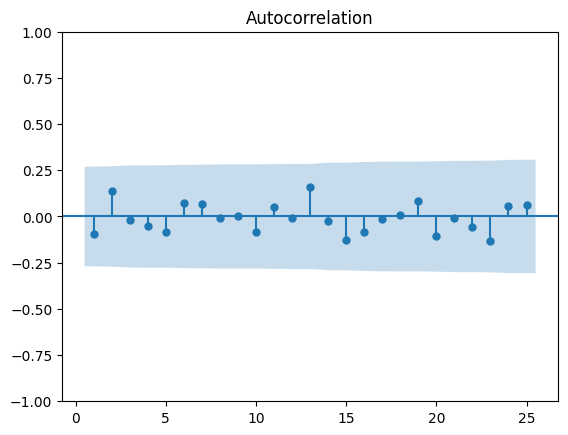

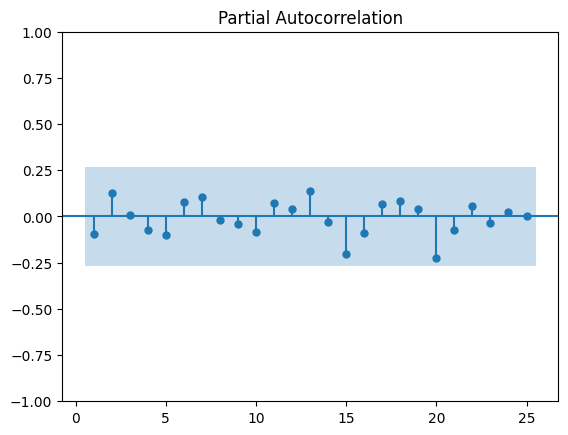

In [65]:
plot_acf(df, lags=25, zero=False)
plot_pacf(df, lags=25, zero=False)
plt.show()

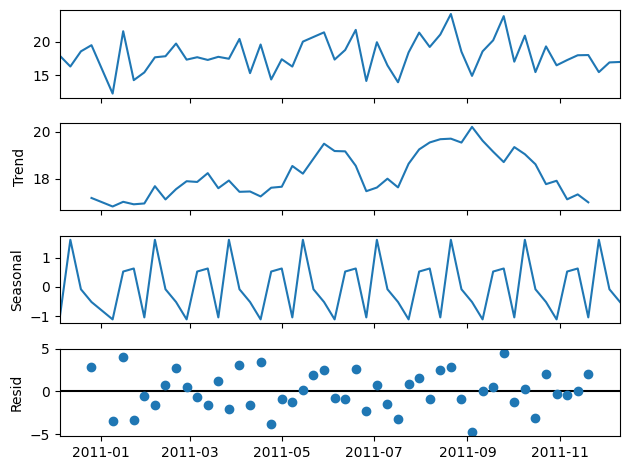

In [66]:
decomp_results = seasonal_decompose(df, period=7)
decomp_results.plot()
plt.show()

In [75]:
model = SARIMAX(
    df,
    order =(1,0,1),
    seasonal_order=(1,0,1,7)
)

results = model.fit()
results.summary()

C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           Revenue   No. Observations:                  305
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -1019.255
Date:                           Mon, 07 Jul 2025   AIC                           2048.511
Time:                                   03:20:14   BIC                           2067.112
Sample:                                        0   HQIC                          2055.951
                                           - 305                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.004    280.348      0.000       0.993       1.007
ma.L1         -0.9864      0.036    -27.602      0.000      -1.056      -0.916
ar.S.L7        0.9990      0.084     11.958      0.000       0.835       1.163
ma.S.L7       -0.9968      0.156     -6.392      0.000      -1.302      -0.691
sigma2        45.4443      2.706     16.795      0.000      40.141      50.748
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               807.97
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             1.74
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
len(df)

305